# Metropolis Hastings Algorithm

*Reference -- [Youtube Video](https://www.youtube.com/watch?v=h1NOS_wxgGg)

The algorithm is described below --

1. Intialize $x^{(0)}$.
2. For $i = 0$ to $N - 1$
    1. Sample $u \sim \mathcal{U}(0, 1)$
    2. Sample $x^* \sim q(x^*|x^{(i)})$
    3. If $u \leq \mathcal{A(x^{(i)}, x^*)} = \min \frac{p(x^*)q(x^{(i)}| x^*)}{p(x^{(i)})q(x^*|x^{(i)})}$
       $ x^{(i+1)} = x^*$
       else
       $x^{(i+1)} = x^{(i)}$
       
# Code for Metropolis Hastings Algorithm

In [19]:
# Import the required modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, truncnorm
%matplotlib inline

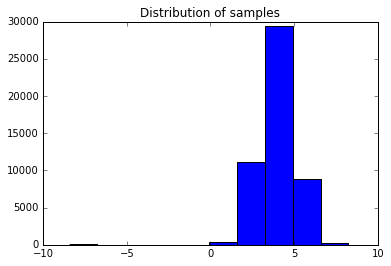

In [16]:
# Example 1 -- Normal Distribution

# Initialize x_0
x_0 = -10
x_i = x_0
no_samples = 50000
samples = []
# Target distribution p is choosen to be a Gaussian of mean 4 and scale 1
# Proposal distribution q is choosen to be a Gaussian of mean x_1 and scale 2
for i in range(no_samples):
    u = np.random.rand()
    x_star = np.random.normal(loc=x_i, scale=2)
    if u < min(1,(norm.pdf(x_star, 4, 1)/norm.pdf(x_i, 4, 1))*(norm.pdf(x_i, x_star, 2)/norm.pdf(x_star, x_i, 2))):
        x_i = x_star
    samples.append(x_i)
plt.hist(samples)
plt.title('Distribution of samples')
plt.show()

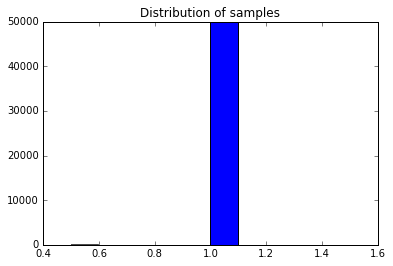

In [39]:
# Example 2 -- Truncated Normal Distribution

# Initialize x_0
x_0 = 1
x_i = x_0
no_samples = 50000
samples = []
# Target distribution p is choosen to be a Truncated Gaussian of a = 4 b = 6 mean 4 and scale 5
# Proposal distribution q is choosen to be a Gaussian of mean x_1 and scale 2
for i in range(no_samples):
    u = np.random.rand()
    x_star = np.random.normal(loc=x_i, scale=3)
    if u < min(1,(truncnorm.pdf(x_star, 4, 6, 5, 5)/(truncnorm.pdf(x_i, 4, 6, 5, 5)+.001))*(norm.pdf(x_i, x_star, 3)/norm.pdf(x_star, x_i, 3))):
        x_i = x_star
    samples.append(x_i)
plt.hist(samples)
plt.title('Distribution of samples')
plt.show()